## Importing python libraries

In [142]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

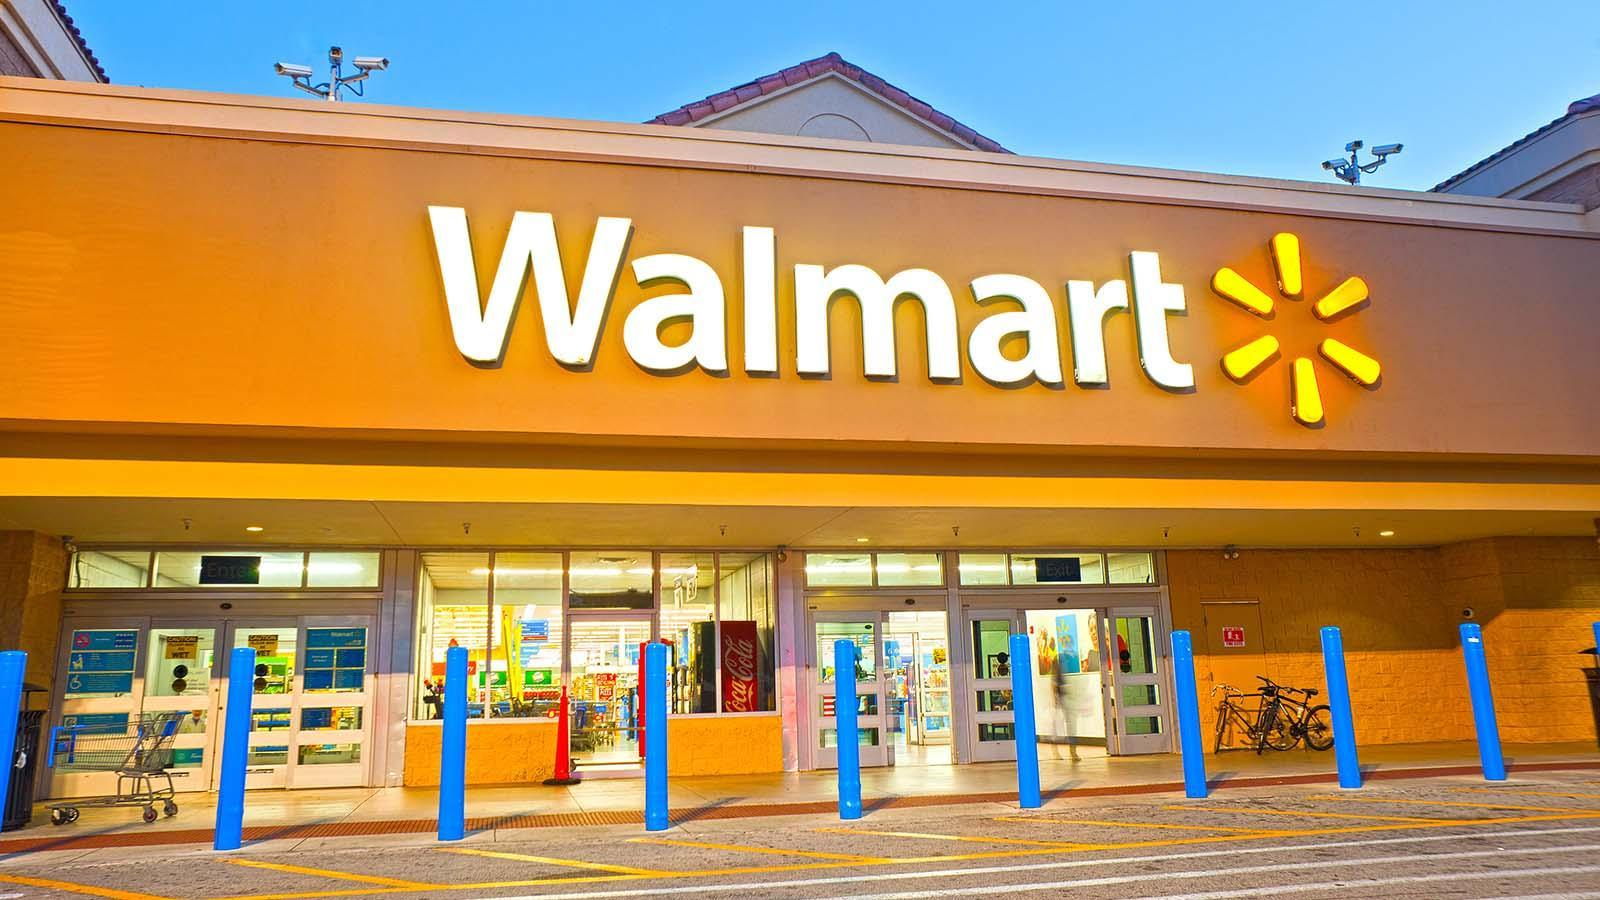!

## Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

- Store - the store number

- Date - the week of sales

- Weekly_Sales -  sales for the given store

- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

- Temperature - Temperature on the day of sale

- Fuel_Price - Cost of fuel in the region

- CPI – Prevailing consumer price index

- Unemployment - Prevailing unemployment rate

## In this, We will resolve following problems :


1. Which store has maximum sales.

2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation.

3. Which store/s has good quarterly growth rate in Q3’2012.

4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

5. Provide a monthly and semester view of sales in units and give insights.
6. Build prediction to forecast demand.

In [143]:
df = pd.read_csv("Walmart_Store_sales.csv")

In [144]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [145]:
df.shape

(6435, 8)

###### Checking for Null value


In [146]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Q1. Which store has maximum sales?

In [148]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [149]:
max_sale = df.groupby('Store')['Weekly_Sales'].sum()
max_sale.idxmax()

20

Text(0, 0.5, 'Total Sales')

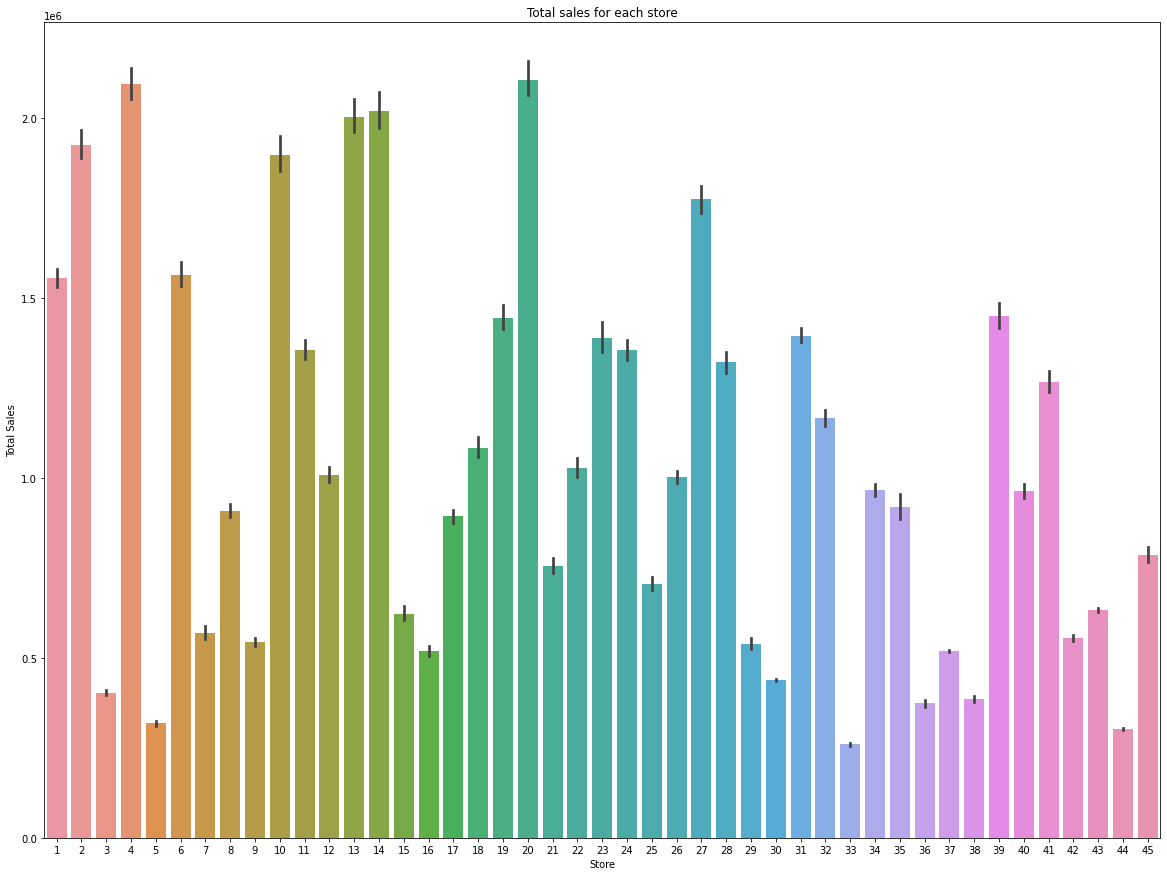

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15))
sns.barplot(x="Store", y="Weekly_Sales", data=df.sort_values(by='Weekly_Sales', ascending=False ))
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')

From above code its clear that for given dataset, store 20 has maximum sale 

### Q2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation?

In [152]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [153]:
#Coefficient of Variance is,   [  Variance = (Standard Deaviation)/(Mean)  ]

coefficient_of_variance = 5.643666e+05/1.046965e+06
coefficient_of_variance

0.5390501115128012

In [154]:
df_store14 = df.loc[df['Store'] == 14]
df_store14.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,143.0,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,14.0,2.020978e+06,0.069930,57.790979,3.417608,186.285678,8.648748
std,0.0,3.175699e+05,0.255926,16.271612,0.443029,3.594820,0.151460
min,14.0,1.479515e+06,0.000000,24.050000,2.699000,181.646815,8.424000
25%,14.0,1.873298e+06,0.000000,45.585000,2.921000,182.619515,8.523000
50%,14.0,2.004330e+06,0.000000,58.850000,3.541000,185.937438,8.625000
75%,14.0,2.125780e+06,0.000000,72.585000,3.809000,189.924736,8.724000
max,14.0,3.818686e+06,1.000000,82.990000,4.066000,192.330854,8.992000


In [155]:
coefficient_of_variance_store14 = 3.175699e+05/2.020978e+06
coefficient_of_variance_store14

0.1571367427057593

Store 14 has maximum standard deviation and coefficient of mean to standard deviation is 0.1571367427057593

### Q3. Which store/s has good quarterly growth rate in Q3’2012?

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [157]:
df['Date'] = pd.to_datetime(df['Date'])

In [158]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

Extracting only 2012 Q3 Data

In [159]:
df_2012 = df.loc[df['year'] == 2012]
df_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,2012,6,1
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1,13
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1,20
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1,27
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,2012,3,2


In [160]:
df_2012_Q3 = df_2012.loc[(df_2012['month'] > 6)  &  (df_2012['month'] < 10)]        #Q3 = Month 7 to 9
df_2012_Q3

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
109,1,2012-09-03,1675431.16,0,58.76,3.669,221.059189,7.348,2012,9,3
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143,2012,8,6
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,2012,7,13
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,2012,7,20
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,2012,7,27
...,...,...,...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684,2012,8,31
6427,45,2012-07-09,766512.66,1,75.70,3.911,191.577676,8.684,2012,7,9
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684,2012,9,14
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684,2012,9,21


In [161]:
max_sale_2012Q3 = df_2012_Q3.groupby('Store')['Weekly_Sales'].sum()
max_sale_2012Q3
max_sale_2012Q3.idxmax()

4

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

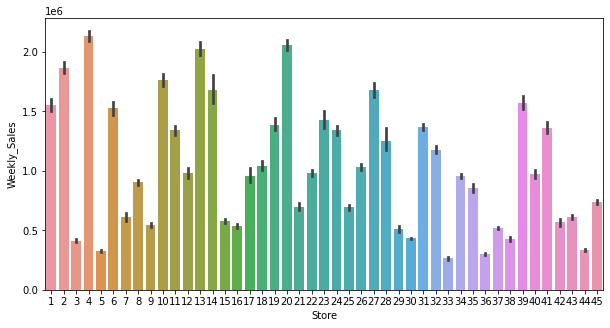

In [163]:
plt.figure(figsize = (10,5))
sns.barplot(x="Store", y="Weekly_Sales", data=df_2012_Q3)

Therefore, Store 4 has good quarterly growth rate in Q3’2012

### 4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together?

In [164]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


In [165]:
a = df.loc[(df['Holiday_Flag'] == 0)].Weekly_Sales.mean()
a

1041256.3802088564

In [166]:
result = df[(df["Weekly_Sales"] > a) & (df['Holiday_Flag'] == 1)]
#List of holidays when sales > (Mean of sales when non holiday)

In [167]:
result

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010,10,9
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,26
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,31
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011,11,2
...,...,...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,2011,12,30
5825,41,2012-10-02,1238844.56,1,22.00,3.103,196.919506,6.589,2012,10,2
5855,41,2012-07-09,1392143.82,1,67.41,3.596,198.095048,6.432,2012,7,9
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,2010,11,26


So from above result there are 220 holidays which has highest sale than mean sale 

### Q5. Provide a monthly and semester view of sales in units and give insights?

In [168]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


In [169]:
df['semester'] = np.where(df['month'] < 7,1,2)             #If value is less than 7 then it will in sem-1 otherwise, sem-2 

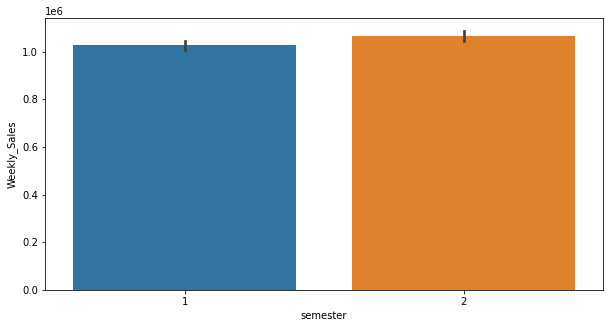

In [170]:
plt.figure(figsize = (10,5))
b = sns.barplot(x="semester", y= "Weekly_Sales", data=df)

##### Monthly sales for each years

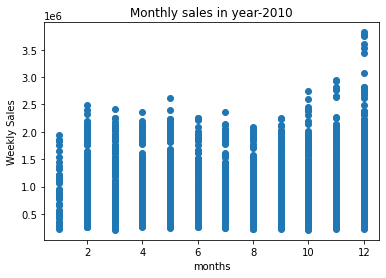

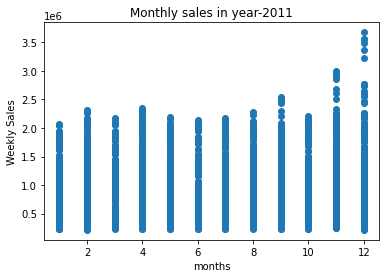

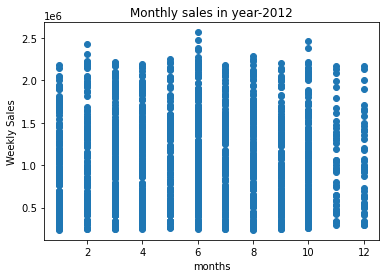

In [174]:
plt.scatter(df[df.year==2010]["month"],df[df.year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly sales in year-2010")
plt.show()

plt.scatter(df[df.year==2011]["month"],df[df.year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly sales in year-2011")
plt.show()

plt.scatter(df[df.year==2012]["month"],df[df.year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly sales in year-2012")
plt.show()

### Q6. Build prediction to forecast demand?

In [176]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,1


###### Changing dates into days by crating new variable

In [177]:
day = df.Date.dt.strftime('%d').unique()
day

array(['02', '19', '26', '03', '04', '16', '23', '30', '05', '14', '21',
       '28', '06', '18', '25', '07', '08', '13', '20', '27', '09', '17',
       '24', '10', '15', '22', '29', '11', '12', '31', '01'], dtype=object)

In [178]:
df1 = df.loc[df['Store'] == 1]
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,1


###### Hypothesizing CPI, unemployment, and fuel price have any impact on sales.

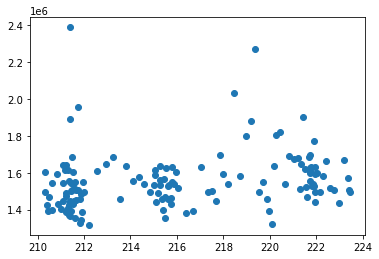

0.22540765942904448


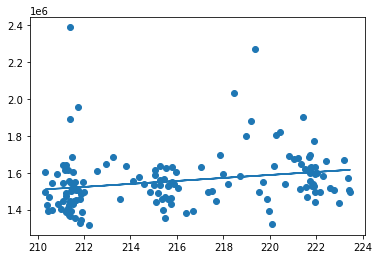

In [179]:
import matplotlib.pyplot as plt

x = df1['CPI']
y = df1['Weekly_Sales']
plt.scatter(x, y)
plt.show()

slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)                                                                                       #r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

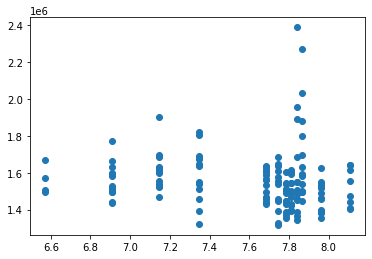

-0.09795539472957951


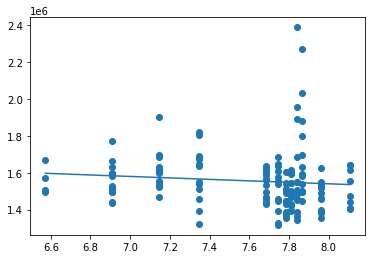

In [180]:
x = df1['Unemployment']
y = df1['Weekly_Sales']
plt.scatter(x, y)
plt.show()

slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)                                                                           #r should be between -1 to 1

def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

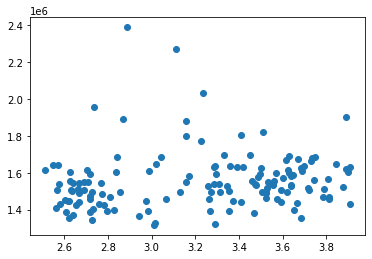

0.12459158039045631


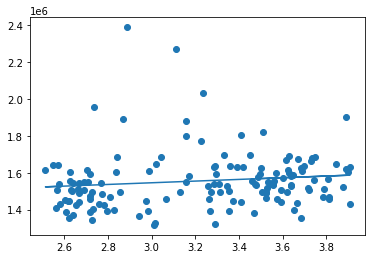

In [181]:
x = df1['Fuel_Price']
y = df1['Weekly_Sales']
plt.scatter(x, y)
plt.show()

slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)                                                                           #r should be between -1 to 1

def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [182]:
experiment_day_start = 5
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst = True)
df1['exp_day'] = (df1['Date']-df1['Date'].min()).dt.days + experiment_day_start

C:\Users\TECHME~1\AppData\Local\Temp/ipykernel_2132/2091913799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'], dayfirst = True)
C:\Users\TECHME~1\AppData\Local\Temp/ipykernel_2132/2091913799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['exp_day'] = (df1['Date']-df1['Date'].min()).dt.days + experiment_day_start


In [183]:
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester,exp_day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,1,117
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2,331
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1,45
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1,52
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,1,118


In [184]:
x = df1[['Unemployment','CPI','exp_day']]
y = df1['Weekly_Sales']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y,test_size=0.2 , random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

In [187]:
y_pred = regressor.predict(x_test)

In [188]:
Predictdf = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
Predictdf

,Actual,Predicted
45,1891034.93,1.505937e+06
118,1611096.05,1.583746e+06
16,1432069.95,1.490733e+06
56,1636263.41,1.528677e+06
22,1546074.18,1.494492e+06
7,1404429.92,1.517969e+06
108,1688420.76,1.583840e+06
134,1582083.40,1.566498e+06
130,1631135.79,1.556742e+06
101,1459601.17,1.571989e+06


In [189]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Unemployment,93350.098776
CPI,11704.068015
exp_day,31.781348


In [190]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 116216.9516990224
Mean Squared Error: 25295466668.185047
Root Mean Squared Error: 159045.48616098808
